In [1]:
from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit
from adjustable_efficient_qsp import *
from qiskit.tools.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

Adjustable-depth efficient Quantum State Preparation circuit with function $f_{\epsilon_0}$ and $\epsilon_0=\frac{1}{10}$:

$$f_{\epsilon_0}(x) = \frac{\sin(2\pi x)}{\epsilon_0}$$

In [14]:
def f(x):
    epsilon0 = 1/10
    return np.sin(2*np.pi*x)*epsilon0

n = 3
n_ancilla_diag = 0
n_ancilla_qsp = 0
gray_code = False

list_operator_to_implement = [i for i in range(2**n)]

# Walsh circuit
q_walsh = QuantumRegister(n,name='q_walsh')
qA_walsh = QuantumRegister(1,name='qA_walsh')
a_walsh = AncillaRegister(n_ancilla_diag,name='a_walsh')
a_qsp_walsh = AncillaRegister(n_ancilla_qsp,name='a_qsp_walsh')
qc_walsh = QuantumCircuit(qA_walsh,q_walsh,a_walsh,a_qsp_walsh)

# Sequential circuit
q_sequential = QuantumRegister(n,name='q_sequential')
qA_sequential = QuantumRegister(1,name='qA_sequential')
a_sequential = AncillaRegister(n_ancilla_diag,name='a_sequential')
a_qsp_sequential = AncillaRegister(n_ancilla_qsp,name='a_qsp_sequential')
qc_sequential = QuantumCircuit(qA_sequential,q_sequential,a_sequential,a_qsp_sequential)

qc_walsh.h(q_walsh)
qc_sequential.h(q_sequential)

qsp_walsh = qsp(n,f,n_ancilla_diag,n_ancilla_qsp,list_operator_to_implement,decomposition='walsh',gray_code=gray_code,swaps=True)
qsp_sequential = qsp(n,f,n_ancilla_diag,n_ancilla_qsp,list_operator_to_implement,decomposition='sequential',gray_code=gray_code,swaps=False)

qc_walsh.append(qsp_walsh,qc_walsh.qubits)
qc_sequential.append(qsp_sequential,qc_sequential.qubits)

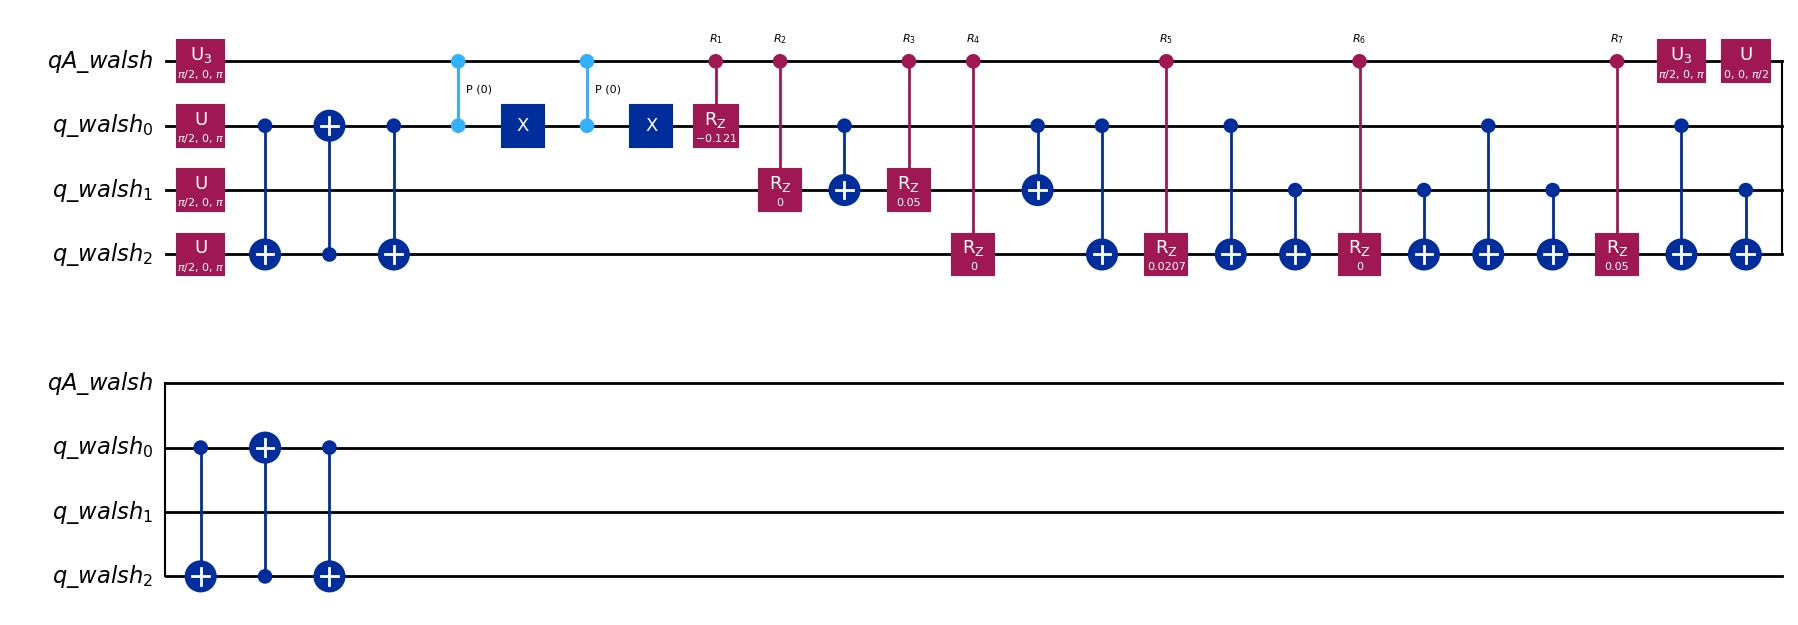

In [15]:
qc_walsh.decompose(reps=3).draw('mpl',style='iqx')

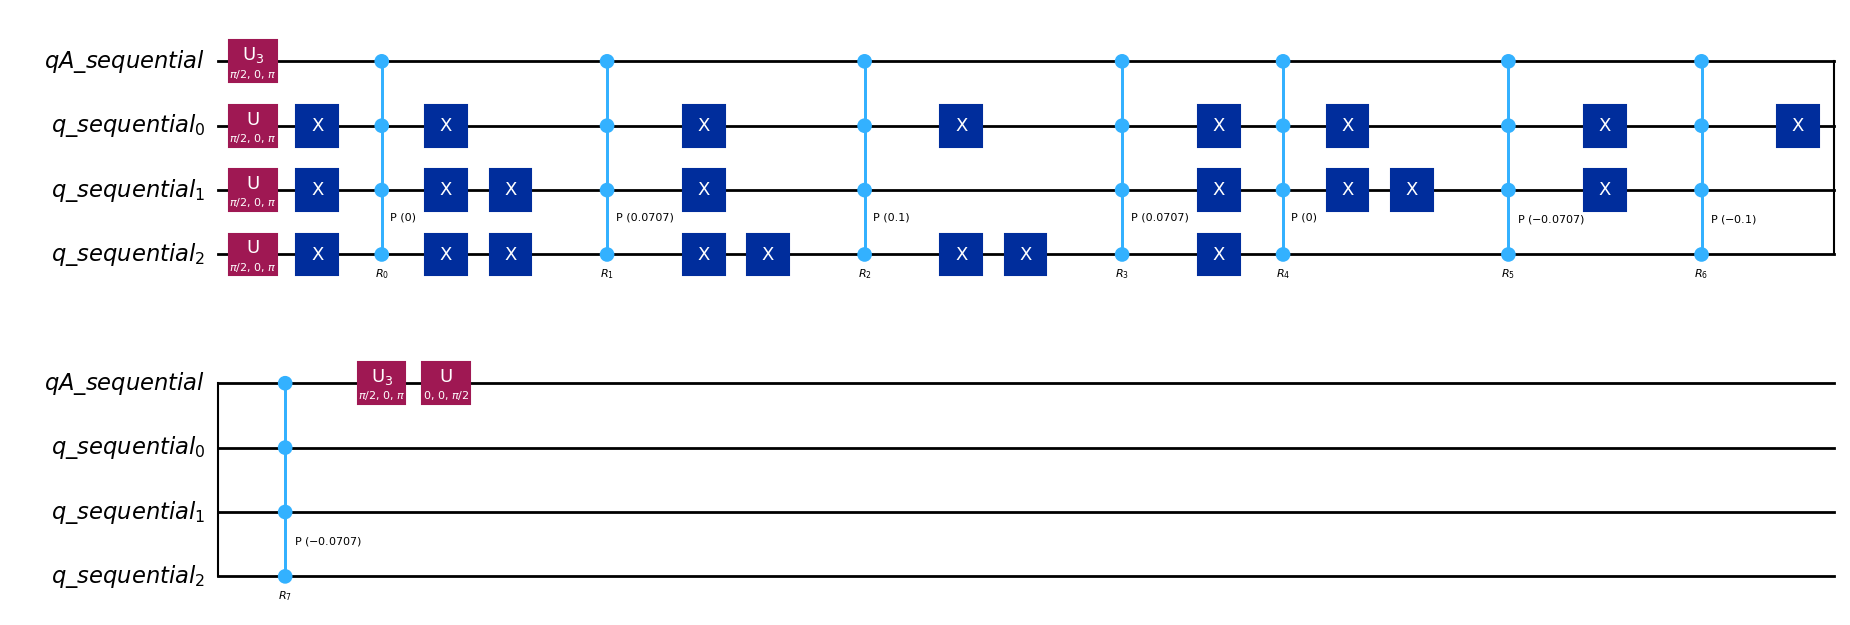

In [16]:
qc_sequential.decompose(reps=3).draw('mpl',style='iqx')

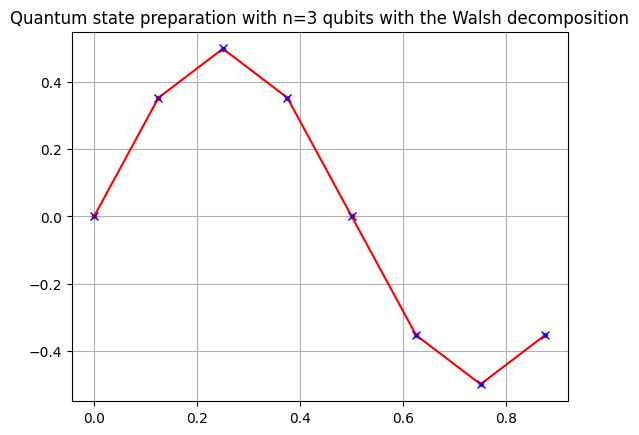

In [21]:
state = qi.Statevector.from_instruction(qc_walsh)
state_dict = state.to_dict()
data = []
n_bits = len(list(state_dict.keys())[0])
for i in list(state_dict.keys()):
    if i[n_bits-1] == '1':
        data.append(state_dict[i])
L = np.array(data)
X = np.array(range(2**n))/(2**n)
plt.plot(X,np.real(L)/np.linalg.norm(L),marker='.',c='r')
plt.plot(X,f(X)/np.linalg.norm(f(X)),marker='x',c='b',linestyle='')
plt.title('Quantum state preparation with n='+str(n)+' qubits with the Walsh decomposition')
plt.grid()
plt.show()

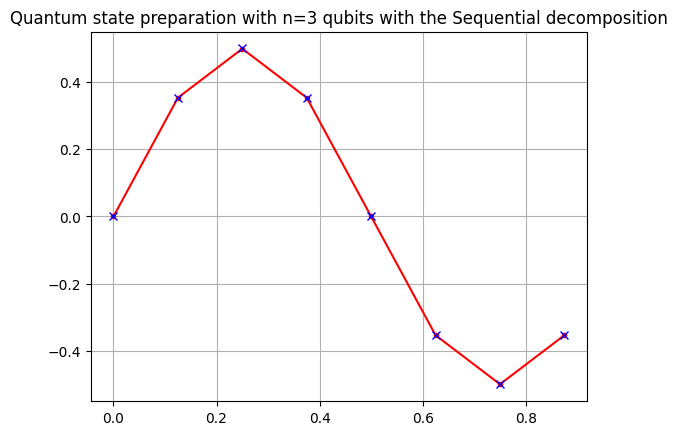

In [22]:
state = qi.Statevector.from_instruction(qc_sequential)
state_dict = state.to_dict()
data = []
n_bits = len(list(state_dict.keys())[0])
for i in list(state_dict.keys()):
    if i[n_bits-1] == '1':
        data.append(state_dict[i])
L = np.array(data)
X = np.array(range(2**n))/(2**n)
plt.plot(X,np.real(L)/np.linalg.norm(L),marker='.',c='r')
plt.plot(X,f(X)/np.linalg.norm(f(X)),marker='x',c='b',linestyle='')
plt.title('Quantum state preparation with n='+str(n)+' qubits with the Sequential decomposition')
plt.grid()
plt.show()